In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the CSV file
result_paper = pd.read_csv('../final_result/result_size_paper.csv')
result_j = pd.read_csv('../final_result/result_size_j.csv')
result_rs = pd.read_csv('../final_result/result_size_rs.csv')

In [3]:
result_paper.head()

,GraphName,MaxRefCount,GraphSize,OffsetSize (J=1),OffsetSize (J=2),OffsetSize (J=4),Link Access Time (seq.),Link Access Time (J=1),Link Access Time (J=2),Link Access Time (J=4)
0,uk-2002,-1,79.0,-,-,-,198,31237,35752,43699
1,uk-2002,3,106.6,141.3,70.7,35.3,206,611,753,886
2,uk-2002,1,122.9,-,-,-,233,442,491,605
3,uk-2002_transpose,-1,70.3,-,-,-,150,2382,2873,2961
4,uk-2002_transpose,3,74.6,141.3,70.7,35.3,171,342,424,516


In [4]:
result_j.head()

,GraphName,MaxRefCount,CompressionWindow,GraphSize,OffsetSize
0,uk-2002,-1,1,78.25,18.81
1,uk-2002,1,1,110.02,20.81
2,uk-2002,3,1,93.09,19.74
3,uk-2002,-1,3,69.27,18.20
4,uk-2002,1,3,94.87,20.04


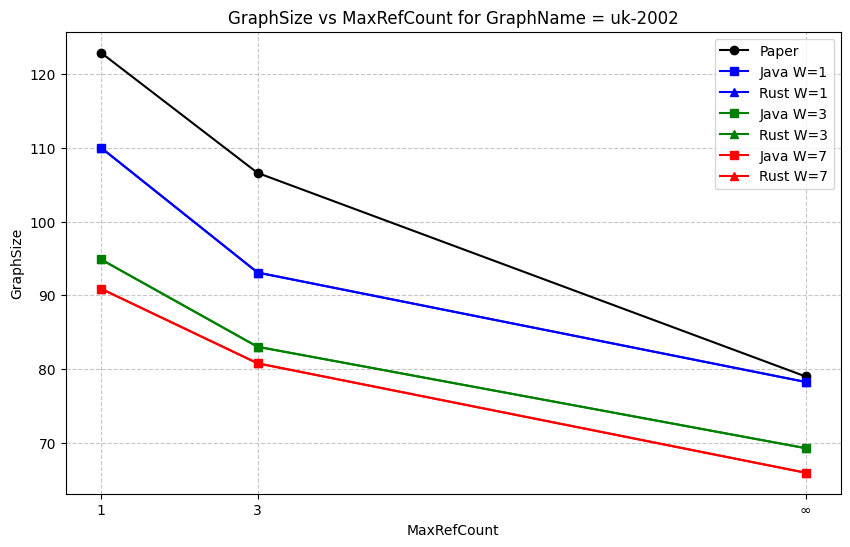

In [5]:
# Handle the MaxRefCount values equal to -1
result_paper.loc[result_paper['MaxRefCount'] == -1, 'MaxRefCount'] = 10
result_j.loc[result_j['MaxRefCount'] == -1, 'MaxRefCount'] = 10
result_rs.loc[result_rs['MaxRefCount'] == -1, 'MaxRefCount'] = 10

# Filter the data for GraphName == 'uk-2002'
result_paper_uk = result_paper[result_paper['GraphName'] == 'uk-2002']
result_j_uk = result_j[result_j['GraphName'] == 'uk-2002']
result_rs_uk = result_rs[result_rs['GraphName'] == 'uk-2002']

# Create the plot
plt.figure(figsize=(10, 6))

# Add the 'Paper' data (without distinguishing by W, so just one line)
plt.plot(result_paper_uk['MaxRefCount'], result_paper_uk['GraphSize'], label='Paper', color='black', marker='o')

# Add the 'Java' and 'Rust' data with different colors for each W value (1, 3, 7)
for W_value, color, label in zip([1, 3, 7], ['blue', 'green', 'red'], ['W=1', 'W=3', 'W=7']):
    # Filter the data for W
    result_j_filtered = result_j_uk[result_j_uk['CompressionWindow'] == W_value]
    result_rs_filtered = result_rs_uk[result_rs_uk['CompressionWindow'] == W_value]
    
    # Sort the data by MaxRefCount
    result_j_filtered = result_j_filtered.sort_values('MaxRefCount')
    result_rs_filtered = result_rs_filtered.sort_values('MaxRefCount')

    # Add the lines for Java and Rust
    plt.plot(result_j_filtered['MaxRefCount'], result_j_filtered['GraphSize'], label=f'Java {label}', color=color, marker='s')
    plt.plot(result_rs_filtered['MaxRefCount'], result_rs_filtered['GraphSize'], label=f'Rust {label}', color=color, marker='^')

# Add labels and title
plt.xlabel('MaxRefCount')
plt.ylabel('GraphSize')
plt.xticks([1, 3, 10], labels=['1', '3', '∞'])
plt.title('GraphSize vs MaxRefCount for GraphName = uk-2002')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.grid(True)

#plt.savefig('plot_uk_size.png', format='png')

plt.show()


